In [111]:
import itertools
import random
import sys
import timer

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import datagrid as dg

In [108]:

def gerar_indices(n):
    """Gera dois índices aleatórios distintos i e j, onde 0 <= i < j < n.
    
    Args:
        n (int): O tamanho do vetor.

    Returns:
        tuple: Uma tupla contendo os dois índices gerados.
    """

    i = random.randint(0, n-2)
    j = random.randint(i+1, n-1)

    return i, j

# Aumenta o limite de recursão do Python (necessário para ordenar grandes quantidades de dados com algoritmos recursivos, como o QuickSort)
sys.setrecursionlimit(10**6)

# Define o tamanho das amostras (2^tamanho_amostra)
TAMANHOS_AMOSTRAS = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]

# Carrega as amostras de dados a partir dos arquivos CSV
amostras = []
for tamanho_amostra in TAMANHOS_AMOSTRAS:
    amostra = dg.DataGrid()
    amostra.read_csv(f"../data_base2/data_2e{tamanho_amostra}.csv", separator=",")
    amostras.append(amostra)

# Define o número de repetições para cada combinação de amostra e estratégia (para calcular a média dos tempos de execução)
NUM_REPETICOES = 10

# Define os métodos para seleção a serem testados e comparados
ESTRATEGIAS = ["order_and_select", "quickselect", "quickselect_median_of_medians"]

# Gera a combinações de amostras e estratégias
combinacoes = list(itertools.product(TAMANHOS_AMOSTRAS, ESTRATEGIAS))
print(f"Processando {len(combinacoes)} combinações de amostras e estratégias...")

# Inicializa um Pandas DataFrame para armazenar os resultados
results = pd.DataFrame(columns=["Tamanho da amostra", "Estratégia", "Tempo de execução (ns)"])

# Itera sobre cada combinação de amostra e estratégia de seleção
for tamanho, estrategia in combinacoes:

    # Limpa o dicionário de tempos de execução
    timer.reset_execution_times()

    # Realiza diversas repetições para cada combinação de amostra e estratégia
    for repeticao in range(NUM_REPETICOES):

        # Cria uma cópia do datagrid
        amostra = amostras[TAMANHOS_AMOSTRAS.index(tamanho)].copy()

        # Randomiza a ordem dos elementos da amostra
        random.shuffle(amostra.list)

        # FORÇA O PIOR CASO: ordena a amostra
        # amostra.sort('count', 'asc', )
        # amostra.ordered_by = None # Reseta o atributo ordered_by para que a função de seleção não utilize a ordenação para otimizar o algoritmo

        # Gera os índices i e j aleatoriamente
        i, j = gerar_indices(amostra.size)

        print(f"Amostra: {tamanho} | Estratégia: {estrategia} | Repetição: {repeticao} | i: {i} | j: {j}")

        # Executa a função de seleção
        amostra.select_count(i, j, strategy=estrategia)

    # Armazena o resultado da execução da função em um Pandas DataFrame
    results = results._append({"Tamanho da amostra": 2**tamanho, "Estratégia": estrategia, "Tempo de execução": timer.get_execution_time("select_count")}, ignore_index=True)

# Imprime os resultados
print(results)


Processando 30 combinações de amostras e estratégias...
Amostra: 1 | Estratégia: order_and_select | Repetição: 0 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 1 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 2 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 3 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 4 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 5 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 6 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 7 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 8 | i: 0 | j: 1
Amostra: 1 | Estratégia: order_and_select | Repetição: 9 | i: 0 | j: 1
Amostra: 1 | Estratégia: quickselect | Repetição: 0 | i: 0 | j: 1
Amostra: 1 | Estratégia: quickselect | Repetição: 1 | i: 0 | j: 1
Amostra: 1 | Estratégia: quickselect | Repetição: 2 | i: 0 | j: 1
Amostra: 1 | Estratégia: quickselect

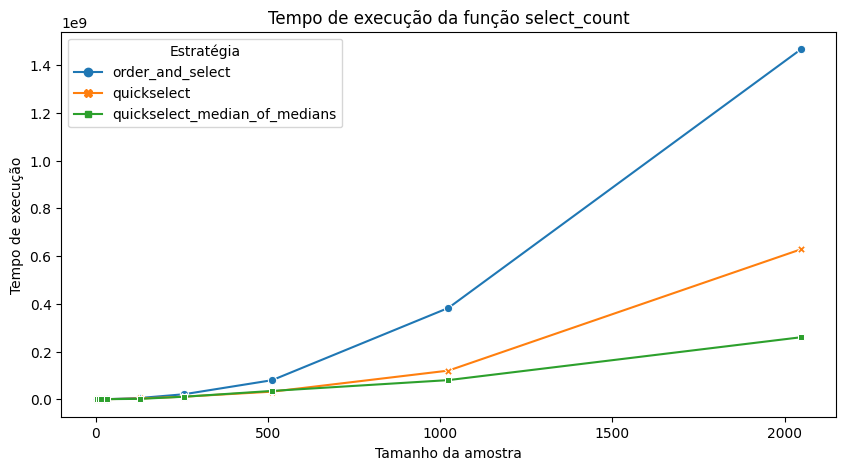

In [109]:
# Plot the results on a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="Tamanho da amostra", y="Tempo de execução (ns)", hue="Estratégia", style="Estratégia", markers=True, dashes=False)
plt.title("Tempo de execução da função select_count")
plt.show()



In [110]:
# save csv
results.to_csv("./NOME DO RESULTADO.csv", index=False)